In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("vehicle.csv")

In [7]:
print("Размерность датасета:", data.shape)
print("\nТипы признаков:\n", data.dtypes)
print("\nКоличество пропусков:\n", data.isna().sum())

display(data.head())

Размерность датасета: (846, 19)

Типы признаков:
 COMPACTNESS                     int64
CIRCULARITY                     int64
'DISTANCE CIRCULARITY'          int64
'RADIUS RATIO'                  int64
'PR.AXIS ASPECT RATIO'          int64
'MAX.LENGTH ASPECT RATIO'       int64
'SCATTER RATIO'                 int64
ELONGATEDNESS                   int64
'PR.AXIS RECTANGULARITY'        int64
'MAX.LENGTH RECTANGULARITY'     int64
'SCALED VARIANCE_MAJOR'         int64
'SCALED VARIANCE_MINOR'         int64
'SCALED RADIUS OF GYRATION'     int64
'SKEWNESS ABOUT_MAJOR'          int64
'SKEWNESS ABOUT_MINOR'          int64
'KURTOSIS ABOUT_MAJOR'          int64
'KURTOSIS ABOUT_MINOR'          int64
'HOLLOWS RATIO'                 int64
Class                          object
dtype: object

Количество пропусков:
 COMPACTNESS                    0
CIRCULARITY                    0
'DISTANCE CIRCULARITY'         0
'RADIUS RATIO'                 0
'PR.AXIS ASPECT RATIO'         0
'MAX.LENGTH ASPECT RATIO'

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO',Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


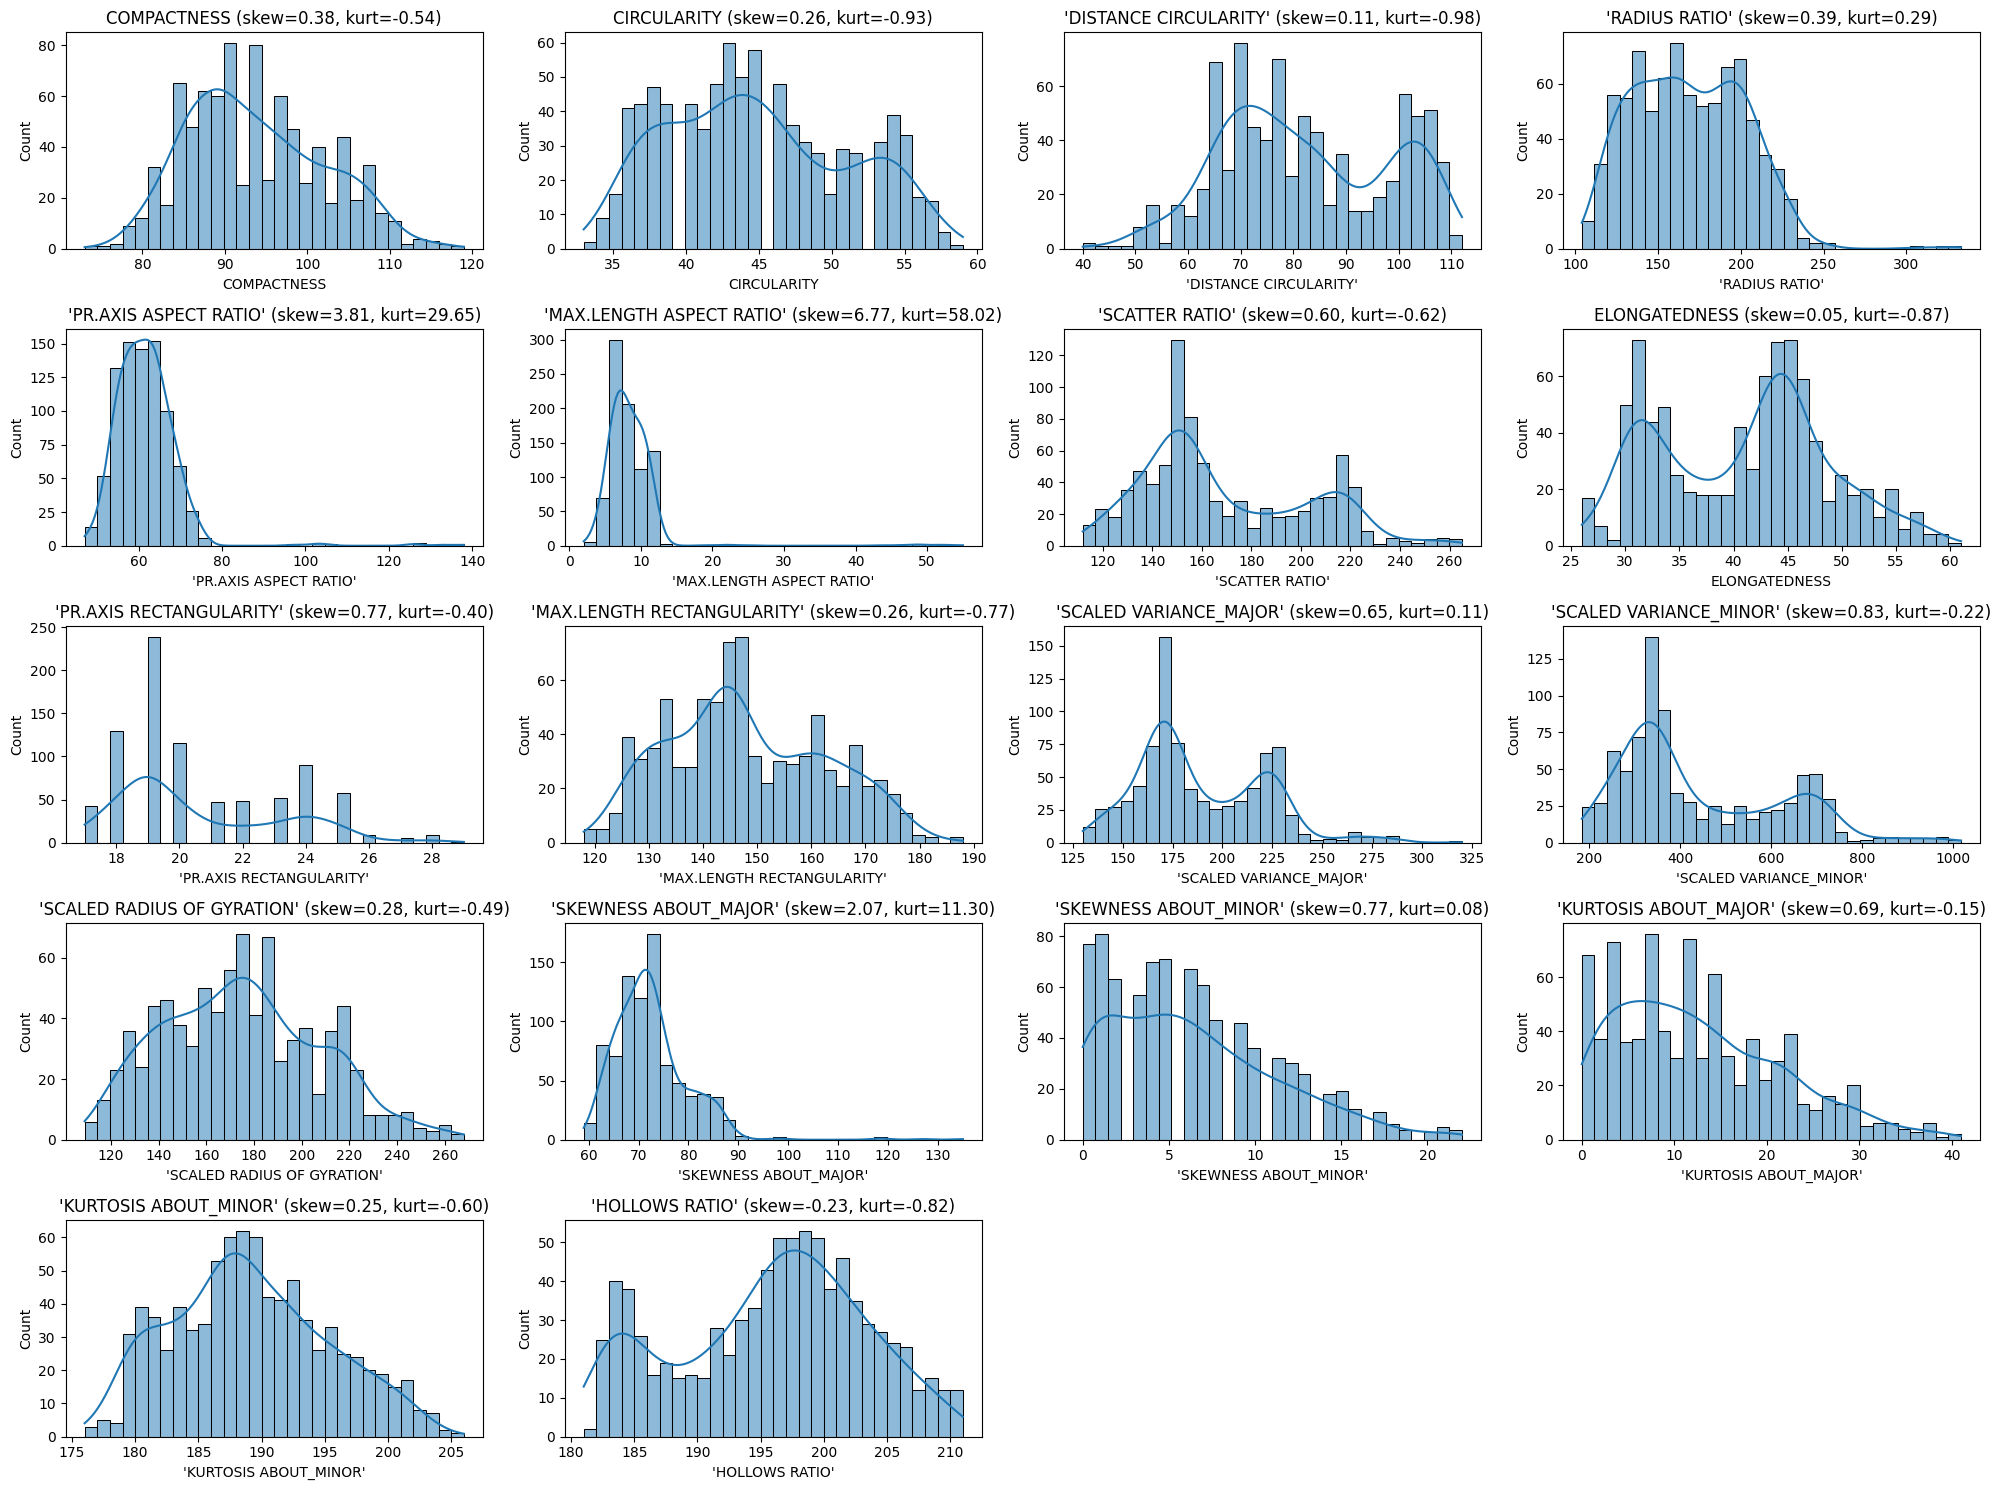

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} (skew={skew(df[col]):.2f}, kurt={kurtosis(df[col]):.2f})')
plt.tight_layout()
plt.show()


Информационная значимость признаков:
                        Feature  Importance
5     'MAX.LENGTH ASPECT RATIO'    0.117563
11      'SCALED VARIANCE_MINOR'    0.084999
9   'MAX.LENGTH RECTANGULARITY'    0.071594
2        'DISTANCE CIRCULARITY'    0.068141
10      'SCALED VARIANCE_MAJOR'    0.067751
6               'SCATTER RATIO'    0.065795
7                 ELONGATEDNESS    0.065375
0                   COMPACTNESS    0.055051
17              'HOLLOWS RATIO'    0.053811
4        'PR.AXIS ASPECT RATIO'    0.052803
13       'SKEWNESS ABOUT_MAJOR'    0.046822
12  'SCALED RADIUS OF GYRATION'    0.038647
3                'RADIUS RATIO'    0.038642
1                   CIRCULARITY    0.038552
15       'KURTOSIS ABOUT_MAJOR'    0.038439
16       'KURTOSIS ABOUT_MINOR'    0.036612
14       'SKEWNESS ABOUT_MINOR'    0.034580
8      'PR.AXIS RECTANGULARITY'    0.024822


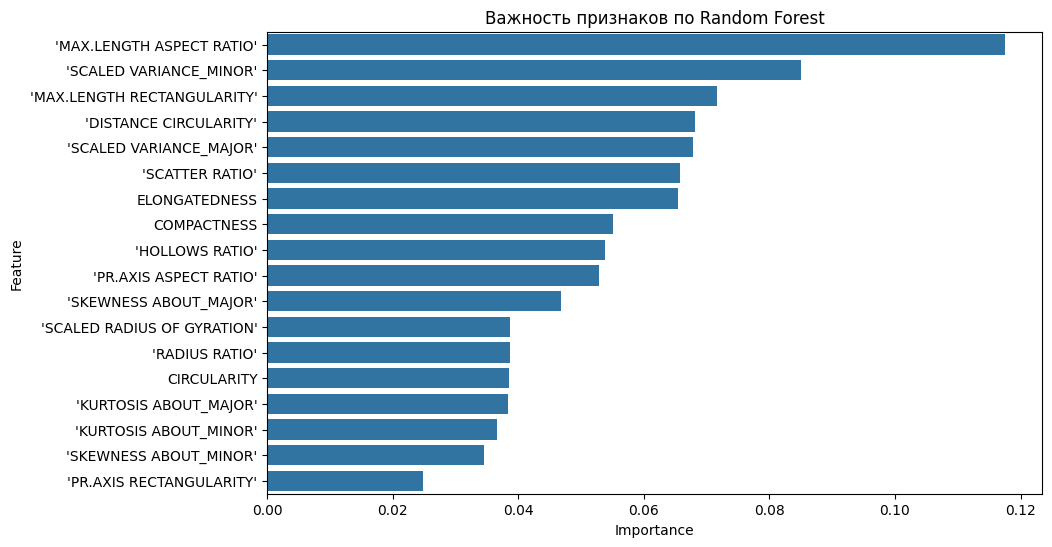

In [9]:
# Для оценки используем Random Forest (только если у нас есть целевая переменная Class)
X = df.drop('Class', axis=1)
y = df['Class']

# Преобразуем категориальные метки в числа
y_encoded = y.astype('category').cat.codes

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nИнформационная значимость признаков:")
print(feature_importance)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Важность признаков по Random Forest")
plt.show()

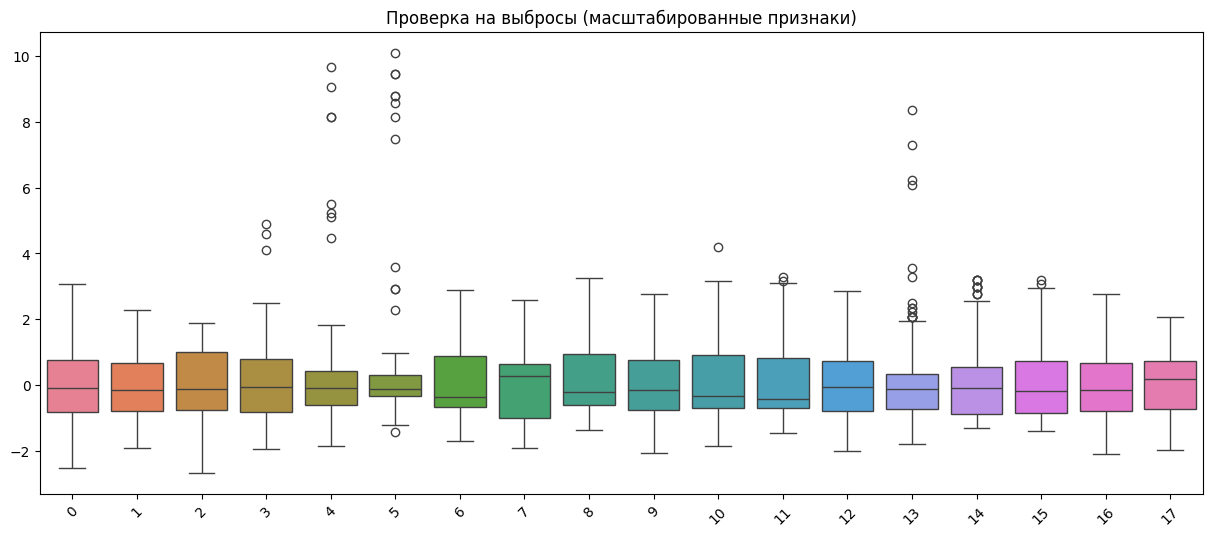

In [14]:
# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Проверка на выбросы
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_scaled)
plt.title("Проверка на выбросы (масштабированные признаки)")
plt.xticks(rotation=45)
plt.show()

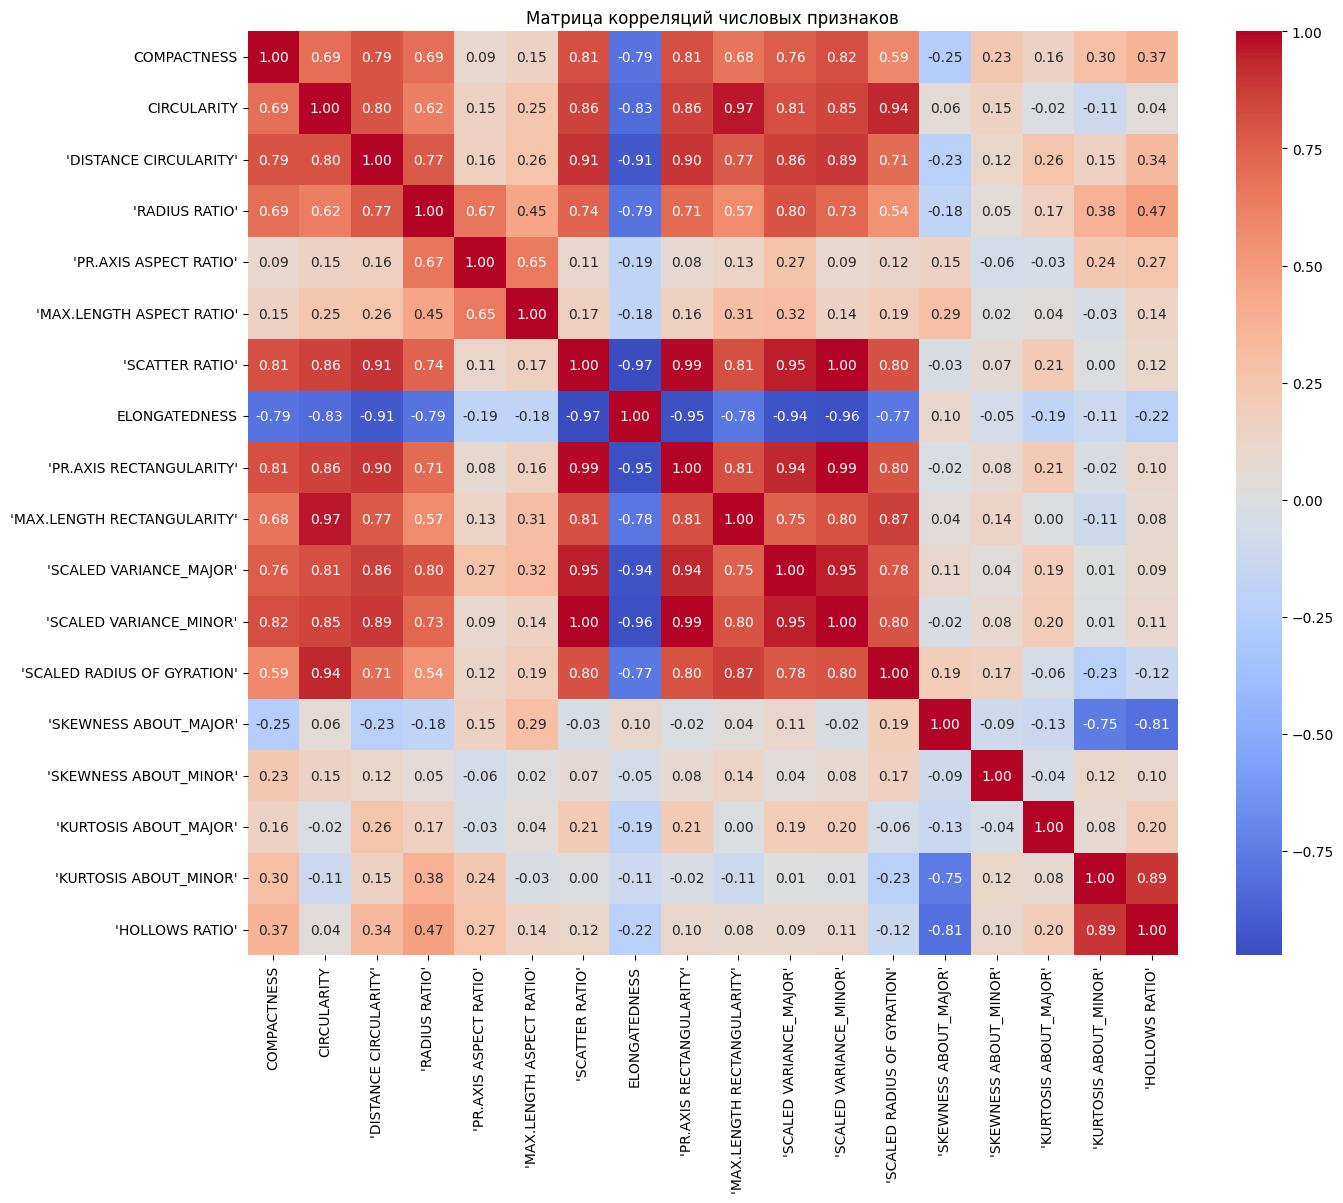

In [11]:
plt.figure(figsize=(15,12))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Матрица корреляций числовых признаков")
plt.show()

In [ ]:
# Считаем признаки сильно коррелирующие друг с другом (>0.85)
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
high_corr = corr_pairs[corr_pairs > threshold].sort_values(ascending=False)

print("Сильно коррелирующие признаки (>|0.85|):")
print(high_corr)

# Создадим список признаков для удаления (оставляем только один из сильно коррелирующих)
to_drop = set()
for (feat1, feat2) in high_corr.index:
    if feat1 not in to_drop and feat2 not in to_drop:
        to_drop.add(feat2)  # оставляем первый, удаляем второй

print("\nПризнаки, которые будут удалены для устранения мультиколлинеарности:")
print(to_drop)

# Удаляем признаки
df_reduced = df.drop(columns=list(to_drop))

Сильно коррелирующие признаки (>|0.85|):
'SCALED VARIANCE_MINOR'      'SCATTER RATIO'                0.996318
'SCATTER RATIO'              'SCALED VARIANCE_MINOR'        0.996318
'PR.AXIS RECTANGULARITY'     'SCALED VARIANCE_MINOR'        0.992346
'SCALED VARIANCE_MINOR'      'PR.AXIS RECTANGULARITY'       0.992346
'SCATTER RATIO'              'PR.AXIS RECTANGULARITY'       0.992088
'PR.AXIS RECTANGULARITY'     'SCATTER RATIO'                0.992088
ELONGATEDNESS                'SCATTER RATIO'                0.973385
'SCATTER RATIO'              ELONGATEDNESS                  0.973385
CIRCULARITY                  'MAX.LENGTH RECTANGULARITY'    0.965776
'MAX.LENGTH RECTANGULARITY'  CIRCULARITY                    0.965776
'SCALED VARIANCE_MINOR'      ELONGATEDNESS                  0.956522
ELONGATEDNESS                'SCALED VARIANCE_MINOR'        0.956522
'SCALED VARIANCE_MAJOR'      'SCATTER RATIO'                0.951862
'SCATTER RATIO'              'SCALED VARIANCE_MAJOR'        0.

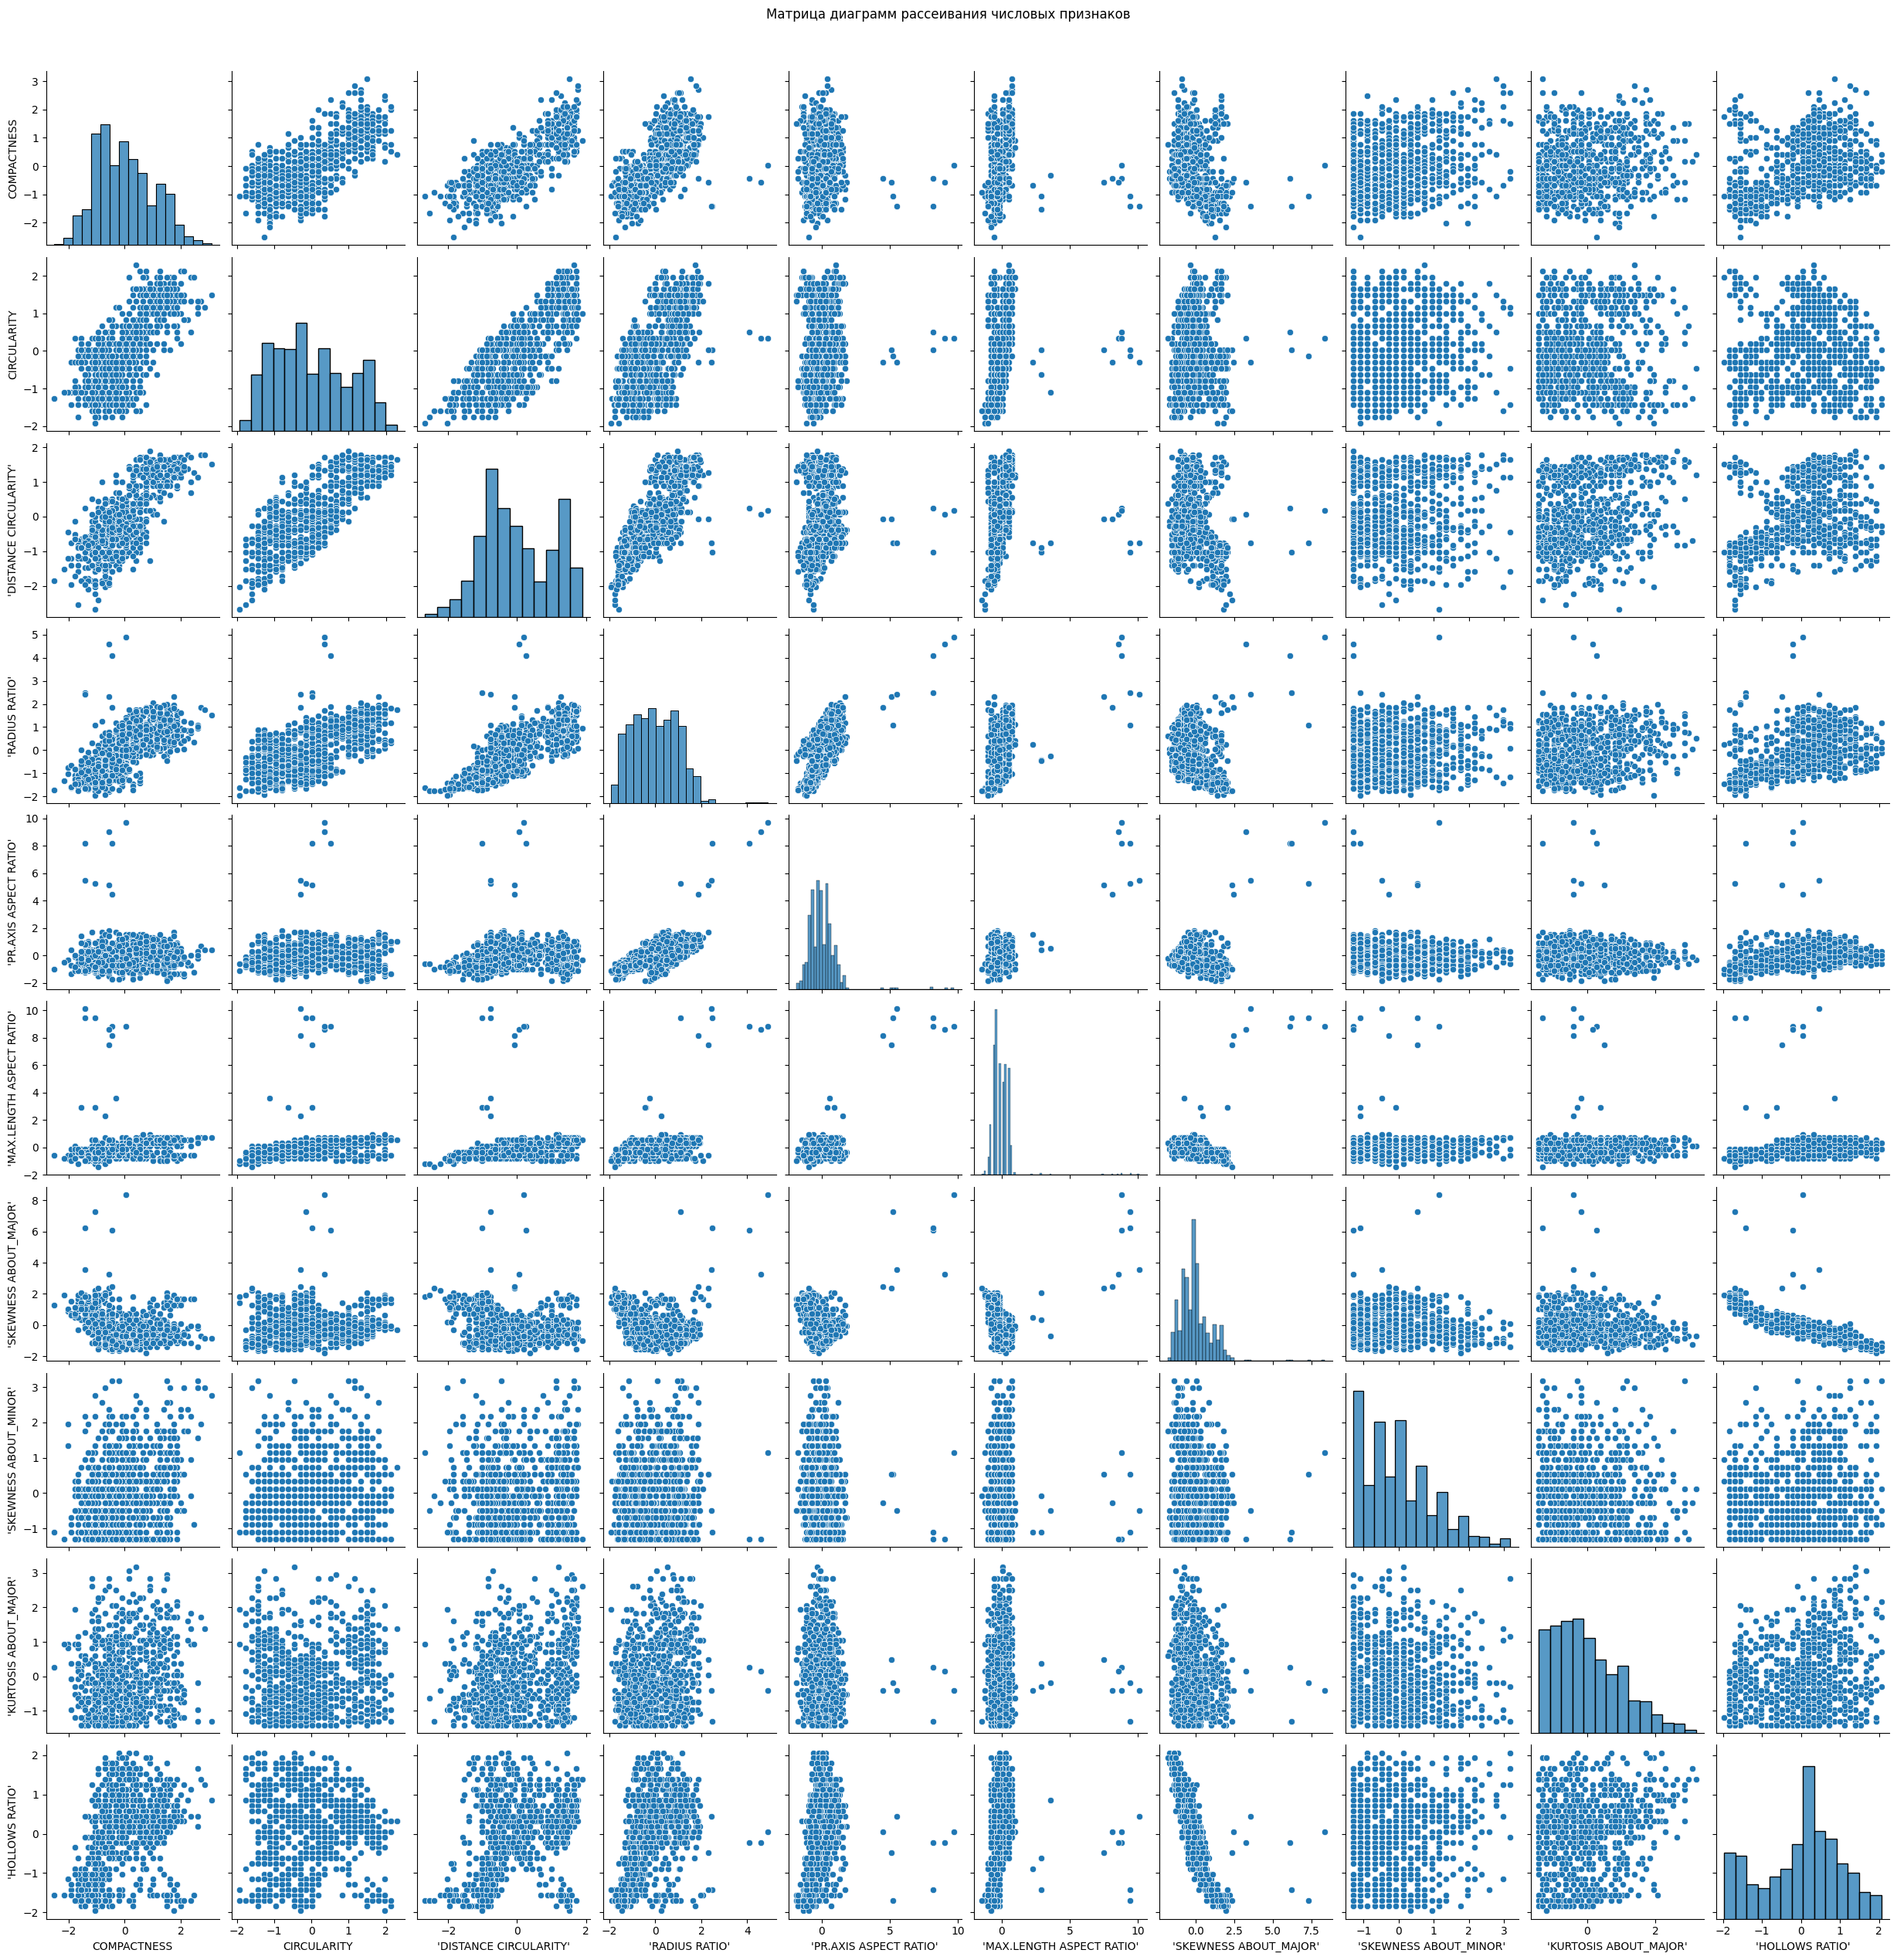

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = df_reduced.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced[numerical_features])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

sns.pairplot(df_scaled, corner=False)
plt.suptitle("Матрица диаграмм рассеивания числовых признаков", y=1.02)
plt.show()